# Introduction to Scikit-Learn
This notebook demonstrates som of the most useful function of
beautiful Scikit-Learn library.
What we're going to cover:
0. end-to-end Scikit-learn workflow
1. getting data ready
2. choose right estimator/algorithm for our problems
3. Fit teh model/algorithm and use it to make predictions
4. Evaluating a model
5. Improve a model
6. Save and load training model
7. Putting all together!

## 0. End-to-End Scikit-learn workflow

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
# 1. Get data ready
heart_disease = pd. read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.shape

(303, 14)

In [4]:
# create X (feature matrix)
X = heart_disease.drop('target',axis=1)

# create y (labels)
y = heart_disease['target']

In [5]:
import warnings
warnings.filterwarnings('ignore')   #ignore the warnings popup if you know
#keep it to 'default' if needed in 'ignore'

In [7]:
# 2. Choose right model and hypermeters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 22:39:24) [MSC v.1916 32 bit (Intel)]
executable: c:\users\user\appdata\local\programs\python\python38-32\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.2.3
   setuptools: 41.2.0
      sklearn: 0.23.2
        numpy: 1.18.1
        scipy: 1.5.2
       Cython: None
       pandas: 0.25.3
   matplotlib: 3.2.1
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [9]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1


In [34]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# make a prediction
y_label = clf.predict(np.array[0,2,3,4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [13]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [28]:
y_preds =clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
y_test

151    1
297    0
150    1
261    0
47     1
      ..
90     1
79     1
145    1
287    0
142    1
Name: target, Length: 61, dtype: int64

In [16]:
# 4. Evaluate the model
clf.score(X_train,y_train)

1.0

In [35]:
clf.score(X_test, y_test)

0.7868852459016393

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1       0.73      0.88      0.80        34

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



In [37]:
confusion_matrix(y_test,y_preds)

array([[16, 11],
       [ 4, 30]], dtype=int64)

In [38]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [39]:
#5.Improve a model
#Try a different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators....')
    clf =RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f'Model accuracy on test set:{clf.score(X_test,y_test)*100:2f}%')
    print('')
          

Trying model with 10 estimators....
Model accuracy on test set:67.213115%

Trying model with 20 estimators....
Model accuracy on test set:72.131148%

Trying model with 30 estimators....
Model accuracy on test set:77.049180%

Trying model with 40 estimators....
Model accuracy on test set:75.409836%

Trying model with 50 estimators....
Model accuracy on test set:75.409836%

Trying model with 60 estimators....
Model accuracy on test set:73.770492%

Trying model with 70 estimators....
Model accuracy on test set:77.049180%

Trying model with 80 estimators....
Model accuracy on test set:78.688525%

Trying model with 90 estimators....
Model accuracy on test set:80.327869%



In [40]:
#6. Save a model and load
import pickle

pickle.dump(clf,open('random_forest_model.pk1','wb'))

In [41]:
loaded_model=pickle.load(open('random_forest_model.pk1','rb'))
loaded_model.score(X_test,y_test)

0.8032786885245902

## 1. GETTING DATA READY FOR MACHINE LEARNING
Three main things we do:
    1. Split data into features and labels (usually 'X' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numeric values to numeric values(also called feature encoding)

In [42]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
X = heart_disease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [44]:
y= heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [45]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#splitting training to 80% and test to 20%

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [47]:
 X.shape,len(heart_disease)

((303, 13), 303)

In [48]:
X.shape[0]*0.8

242.4

In [49]:
242+61

303

In [50]:
heart_disease.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

## 1.1 Make sure it's all numerical

In [51]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [52]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [53]:
len(car_sales)

1000

In [54]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [55]:
#Split into X/y
X=car_sales.drop('Price',axis=1)
y=car_sales['Price']

#Split into training and test
X_train,X_test,y_test,y_train=train_test_split(X,y,test_size=0.2)

In [56]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [57]:
#Turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                                 remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [58]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [59]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [60]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [61]:
#Let's refite the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                              y,
                                              test_size=0.2)



model.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
model.score(X_train,y_train)

0.891612713353635

In [63]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there were missing values?
1. Fill them with some values(also known as imputation)
2. Remove the samples with missing data altogether

In [64]:
# Import car sales missing data
car_sales_missing= pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
car_sales_missing.isnull().any()

Make             True
Colour           True
Odometer (KM)    True
Doors            True
Price            True
dtype: bool

In [67]:
#Create X and y
X = car_sales_missing.drop('Price',axis=1)
y= car_sales_missing['Price']

In [68]:
#Lets try and convert datas into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                                 remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X  

ValueError: Input contains NaN

In [69]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [70]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [71]:
#Fill the 'Make' columns
car_sales_missing['Make'].fillna('missing',inplace=True)

#Fill the 'Colour' columns
car_sales_missing['Colour'].fillna('missing',inplace=True)

#Fill the 'Odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [72]:
#check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [73]:
#Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)

In [74]:
car_sales_missing.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [75]:
len(car_sales_missing)

950

In [76]:
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [77]:
#Lets try and convert datas into numbers
#convert categorical into numerical

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                                 remainder='passthrough')
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X  

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikit-learn

In [78]:
car_sales_missing= pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [79]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [80]:
#Drop the rows with no labels('Price')
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [81]:
#Split into X and y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [82]:
#Fill missing value with Scikit_learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with 'missing' and numeric values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#Define columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#Create an imputer (something that fills missig data)
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [83]:
car_sales_filled=pd.DataFrame(filled_X,
                             columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [84]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [85]:
#Turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                                 remainder='passthrough')
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [86]:
#Now we've got datas as numbers and filled(no missing values)
#Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(transformed_X,
                                                  y,
                                                  test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [87]:
len(car_sales_filled),len(car_sales)

(950, 1000)

## 2. Choose the right estimator/algorithm for our problems
Scikit learn uses estimator as another term for machine learning model algorithm.

* Classification - predicting whether a sample is one thing or another
* Regresstion - predicting a number

### 2.1 Picking machine learning model for a regression problem

In [90]:
#Importing Boston Housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [89]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [91]:
#How many samples?
len(boston_df)

506

In [95]:
# Lets try ridge regression model
from sklearn.linear_model import Ridge

#setup reandom seed
np.random.seed(42)

#Create the data
X = boston_df.drop('target',axis=1)
y = boston_df['target']

#Split into train test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate Ridge model
model = Ridge()
model.fit(X_train,y_train)

#Check score of Ridge model on test data
model.score(X_test,y_test)

0.6662221670168521

* How do we imporove the score ?
* How do we know the ridge is not working?


In [93]:
#Lets' try Random forest regressor
from sklearn.ensemble import RandomForestRegressor

#setup random number
np.random.seed(44)

#create the data
X= boston_df.drop('target',axis=1)
y=boston_df['target']

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantite Random forest regressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

#Evaluate Random forst regressor
rf.score(X_test,y_test)

0.891728854028301

In [94]:
#Check the ridge model again
model.score(X_test,y_test)

0.784828999610506

### 2.2 Chosing the estimator for classification probelem

In [96]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
len(heart_disease)

303

Consulting the map and it says linersvc

In [98]:
#Import LinerSVC estimator class
from sklearn.svm import LinearSVC

#Setup reandom seed 
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Intentiate LInerSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

#Evaluate the LinerSVC
clf.score(X_test,y_test)

0.8688524590163934

In [99]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [100]:
#Import RandomforestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup reandom seed 
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Intentiate RandomForestClassifies
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

0.8524590163934426

* Tidbit:
    1. If you have structured data use ensemble methods
    2. If you have unstructured data use deep learning and transfer learning

In [101]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data

* 'X' = features, feature variables, data
* 'y' = labels, targets, target variables

In [102]:
#Import RandomforestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup reandom seed 
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Intentiate RandomForestClassifies
clf = RandomForestClassifier(n_estimators=1000)

#Fit the model to data  (training machine learning model)
clf.fit(X_train,y_train)

#Evaluate the RandomForestClassifier   (use the model machine has learned)
clf.score(X_test,y_test)

0.8688524590163934

In [103]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [104]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using machine learning models

 2 ways to make predictions
1. 'predict()'
2. 'predict_proba()'

In [105]:
# Use a train model to make predictions
clf.predict(np.array([2,3,53,5])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.  3. 53.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
X_test.shape

(61, 13)

In [107]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [108]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [109]:
#Compare predictions to turth labels to evaluate the model
y_preds =clf.predict(X_test)
np.mean(y_preds==y_test)

0.8688524590163934

In [110]:
clf.score(X_test,y_test)

0.8688524590163934

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

Make predictions with predict_proba()

In [112]:
# predict_proba() returns the probabilities of classification label
clf.predict_proba(X_test)[:5]

#gives probability of two classifiers like coin toss

array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ]])

In [113]:
0.894+0.106

1.0

In [114]:
#Lets predict on same data....
clf.predict(X_test[:5])

#predict gives the actual predictted labels

array([0, 1, 1, 0, 1], dtype=int64)

In [115]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

'predict()' can also be used for regression model

In [116]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [117]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X =boston_df.drop('target',axis=1)
y= boston_df['target']

#SPlit into trainig and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate and fit model
model=RandomForestRegressor().fit(X_train,y_train)

#make prediction
y_preds = model.predict(X_test)

In [118]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [119]:
np.array(y_test)[:10]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [120]:
# compare the prediction to the true
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4. Evaluating Machine learnig model

Three ways to evaluate scikit learn model/estimators
1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem-specific metric function

### 4.1 Evaluating model with score method

In [121]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
clf.score(X_train,y_train)

1.0

In [123]:
clf.score(X_test,y_test)

0.8524590163934426

In [124]:
#Let's do the same but for regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X =boston_df.drop('target',axis=1)
y= boston_df['target']

#SPlit into trainig and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate and fit model
model=RandomForestRegressor().fit(X_train,y_train)


In [125]:
model.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating model using a scoring parameter

In [127]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train);

In [128]:
clf.score(X_test,y_test)

0.8524590163934426

In [129]:
cross_val_score(clf,X,y,cv=10) #creates 5 different splits

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [132]:
np.random.seed(42)

#single training and tst split score
clf_single_score = clf.score(X_test,y_test)

#Take the mean of 5_fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [134]:
#Default scoring parameter of classifier = mean accuracy
clf.score(X_test,y_test)

0.8524590163934426

In [135]:
#Scoring parameter sxet to none by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2 Classification model evalutation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Clasification report

#### Accuracy

In [146]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [144]:
np.mean(cross_val_score)

0.8248087431693989

In [145]:
print(f'Heart disease classifier accuracy:{np.mean(cross_val_score)*100:.2f}%')

Heart disease classifier accuracy:82.48%


**Area under receiver operating characterstics curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate(fps)

* True positive = model predicts 1 when truth is 1
* False positive = model prodicts 1 when truth is 0
* True negative = model predices 0 when truth  is 0
* False negative = model predicts 0 when truth is 1

In [148]:
# Create X_test ....
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [151]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train,y_train)

#Make predictions with porbability
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.85, 0.15],
       [0.57, 0.43],
       [0.62, 0.38],
       [0.94, 0.06],
       [0.2 , 0.8 ],
       [0.91, 0.09],
       [0.01, 0.99],
       [0.2 , 0.8 ],
       [0.04, 0.96],
       [0.62, 0.38]])

In [152]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.15, 0.43, 0.38, 0.06, 0.8 , 0.09, 0.99, 0.8 , 0.96, 0.38])

In [154]:
#Calculate fpr, tpr and threshold
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#CHeck false positve
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.10344828,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.37931034,
       0.4137931 , 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       0.62068966, 0.65517241, 0.68965517, 0.75862069, 0.82758621,
       0.89655172, 1.        ])

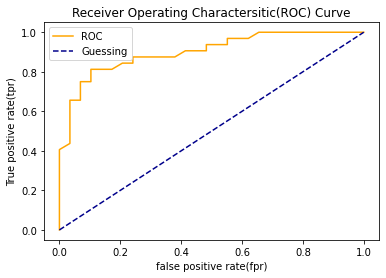

In [162]:
#Create the funciton for plotting ROC funciton
%matplotlib inline
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and tre positive rate(fpr) of a model.
    """
    #Plot roc curve
    plt.plot(fpr,tpr,color='orange', label='ROC')
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--', label='Guessing')
    
    #Customizing the plot
    plt.xlabel('false positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Charactersitic(ROC) Curve')
    plt.legend()
    
plot_roc_curve(fpr,tpr)

In [163]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9008620689655172

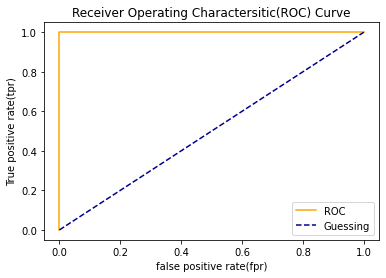

In [164]:
#plot perfect cureve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [165]:
#perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusiong matrix is a quick way to compare the labels a model predicts and the acutal labels it was suposed to predict.

In essence giving an idea of where the model is getting confused.

In [173]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[22,  7],
       [ 5, 27]], dtype=int64)

In [171]:
#Visualize confusion matrix wiht pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Acutal Labels'],
           colnames=["Predicted Lavels"])

Predicted Lavels,0,1
Acutal Labels,,
0,22,7
1,5,27


In [175]:
22+7+5+27

61

In [176]:
len(y_preds),len()

61

In [181]:
#how to install pip package into current environment
import sys
!pip install seaborn

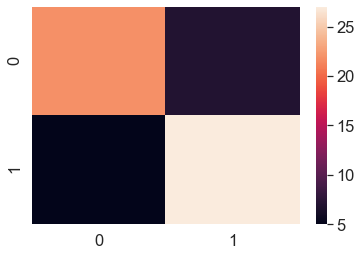

In [178]:
# make our confusion matirx more visual wiht seaborn heatmap
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)
#create th confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);


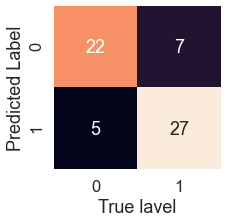

In [185]:
def plot_conf_mat(conf_mat):
    """
    plot confusion matrixs wih seaborn's haetmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                  annot=True #Annotate teh boxes with conf_mat info
                  , cbar=False)
    plt.xlabel('True lavel')
    plt.ylabel('Predicted Label');

plot_conf_mat(conf_mat)

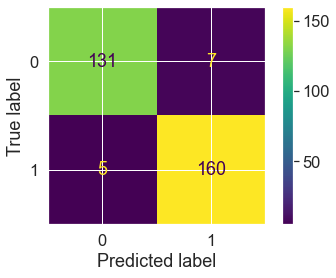

In [187]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,y);

**Classification report**

In [193]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [197]:
# where precision and recall become valueable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds=np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                   output_dict=True   #if false cannot visualize with error
                                  ))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**To summarize classification matrics:**
* Accuracy: is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labeled
                                                                        with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for highere precision
* If false negative predictions are worse than false posittives airm for higher recall
* F1 score is a combination of precison and recall

### 4.2.2 Regression model evalution metrics

1. R^2 (r squared ) coffecient of determination
2. Mean absoluter error (MAE)
3. Mean squarred error(MSE)

**R^2**
* COmpares yours models predictions to the mean of target.
range form negative infinity to 1. FOr example if all your model does is predcict the mean of the targets, it's R^2 vlue would be 0 and if your model perfectly predits a range of numbers it's R^2 value would be 1.

In [209]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X =boston_df.drop('target',axis=1)
y=boston_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor().fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

In [211]:
from sklearn.metrics import r2_score
#Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [216]:
y_test.mean()

21.488235294117644

In [218]:
r2_score(y_test,y_test_mean)

0.0

In [219]:
r2_score(y_test,y_test)

1.0

**Mean absolute error(MAE)** 

 It is average of absolute difference between predictions and actual values. It gives you an idea of how wrong your model predicts are.

In [222]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [224]:
df = pd.DataFrame(data={'actual values':y_test,
                       'predicted values':y_preds})
df['differences']=df['predicted values']-df['actual values']

In [226]:
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error(MSE)**

In [231]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [232]:
#calculate mse by hand
np.square(df['differences']).mean()

9.867437068627442

### 4.23 Finally using the scor}ing parameter

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',1)
y=heart_disease['target']

clf=RandomForestClassifier()


In [239]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [240]:
#cross_validated ccuracy
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is: 82.48%


In [243]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
#cross_validated ccuracy
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is: 82.48%


In [247]:
#precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8222673160173161

In [248]:
#recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8363636363636363

In [251]:
#f1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8410518844144832

How about the  regression model?

In [252]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=boston_df.drop('target',1)
y=boston_df['target']

model=RandomForestRegressor()

In [256]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [254]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [259]:
#mean absolute error
cv_mean= cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_mean

array([-2.07295098, -2.54170297, -3.35348515, -3.79706931, -3.23655446])

In [261]:
#mean squared error
cv_mse=cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.54575220407687

### 4.3 Using different evaluation matrics as Scikit_learn functions

#### Cassification evalutaion functions

In [267]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X =heart_disease.drop('target',1)
y= heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier().fit(X_train,y_train)

#Make score predictions
y_pred=clf.predict(X_test)

#Evalutaion the classifier
print(f'Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print(f'Precision:{precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'F1: {f1_score(y_test,y_pred)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision:0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation metrics**

In [277]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop('target',1)
y=boston_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

#Make prediction using our regression model 
y_preds=model.predict(X_test)

#Evaluation the regression model:
print('Regression model evaluation metrics on test set:')
print(f'F^2: {r2_score(y_test,y_preds)}')
print(f'MAE: {mean_absolute_error(y_test,y_preds)}')
print(f'MSE: {mean_squared_error(y_test,y_preds)}')

Regression model evaluation metrics on test set:
F^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

First prediction= baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally more data the better)
* COuld we imporove our data? 

From a model perspective :
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Paramaters

* Parameters = models find these patterns in data
* Hyperparameters = settings on a model you can adjust to (ptentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly wiht RandomSearchCV
3. Exhaustively with GridSearchCV

In [281]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100)

In [280]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, trraining , validation and test

WE're going to try and adjust:
* 'max_depth'
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators


In [312]:
def evaluate_preds(y_true,y_preds):
    """ Performs evaluation comparison on y_true vs. y_pred labels
    on a classification.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                   'precision':round(precision,2),
                   'recall':round(recall,2),
                   'f1':round(f1,2)}
    print(f'Accuracy: {accuracy*100:.2f}%' )
    print(f'Precison: {precision:.2f}')
    print(f'Recall: {recall}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [313]:
heart_disease.shape

(303, 14)

In [314]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffling data
heart_disease_shuffled = heart_disease.sample(frac=1)

#split into x and y
X = heart_disease_shuffled.drop('target',1)
y = heart_disease_shuffled['target']

#split the data into train validation and test
train_split = round(0.7 *len(heart_disease_shuffled)) #70% of data
valid_spilt = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_spilt],y[train_split:valid_spilt]
X_test,y_test = X[valid_spilt:] ,y[valid_spilt:]

len(X_train),len(X_valid),len(X_test)


clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#predict on validation data i.e baseline predictions
y_preds = clf.predict(X_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy: 82.22%
Precison: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [318]:
np.random.seed(42)

#create the second classifier with different hyperparameters
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,y_train)

#make predictions with different htyperparameters
y_preds2 = clf2.predict(X_valid)

#Evalute the 2nd classifere
clf2_metrics = evaluate_preds(y_valid,y_preds2)


Accuracy: 82.22%
Precison: 0.84
Recall: 0.84
F1 score: 0.84


In [319]:
# WHen we try by hand it takes alot of time 
# clf3= RandomForestClassifier(n_estimators=100,max_depth=10)

### 5.2 Hyperparameter tuning by using RandomizedSearchCV

In [326]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[10,100,200,500,1000,1200],
     'max_depth':[None,5,10,20,30],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2,4,6],
     'min_samples_leaf':[1,2,4]}
np.random.seed(42)

#Split inot X and y
X = heart_disease_shuffled.drop('target',1)
y = heart_disease_shuffled['target']

#Split into train ,and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

#INstantiate RandomForestClaSSifier
clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

#Fit the randomizedSeearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.9s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.4s finished


In [328]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [330]:
#make prediction with best hyperparameters
rs_y_preds =rs_clf.predict(X_test)

#Evalutae teh preditions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precison: 0.77
Recall: 0.8571428571428571
F1 score: 0.81


### 5.3 Hyperparameters  tuing with GridSearchCV

In [331]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [333]:
6*5*2*3*3*5

2700

In [335]:
grid_2 = {'n_estimators': [ 100, 200, 500],
           'max_depth': [None],
           'max_features': ['auto', 'sqrt'],
            'min_samples_split': [6],
            'min_samples_leaf': [1, 2]}



In [336]:
3*1*2*1*2*5

60

In [349]:
from sklearn.model_selection import GridSearchCV, train_test_split


grid={'n_estimators':[10,100,200,500,1000,1200],
     'max_depth':[None,5,10,20,30],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2,4,6],
     'min_samples_leaf':[1,2,4]}
np.random.seed(42)

#Split inot X and y
X = heart_disease_shuffled.drop('target',1)
y = heart_disease_shuffled['target']

#Split into train ,and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

#INstantiate RandomForestClaSSifier
#clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
#gs_clf = GridSearchCV(estimator=clf,
                          # param_grid=grid_2,
                           
                          # cv=5,
                          # verbose=2)

#Fit the GridSeearchCV version of clf
#gs_clf.fit(X_train,y_train);



In [340]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [341]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions

gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy: 78.69%
Precison: 0.74
Recall: 0.8214285714285714
F1 score: 0.78


Let's compare the different models metrics

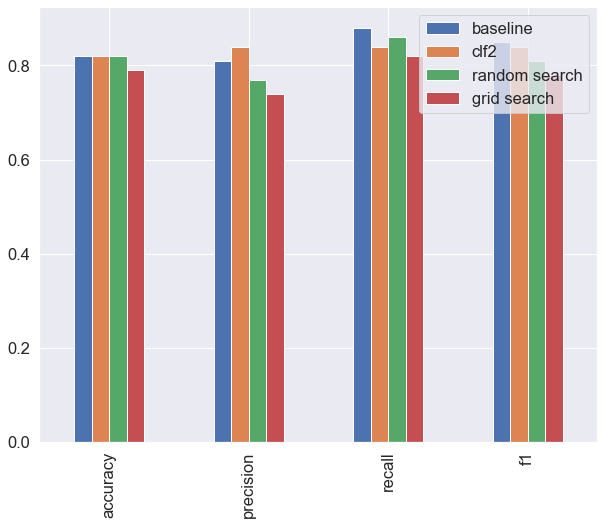

In [344]:
compare_metircs = pd.DataFrame({"baseline":baseline_metrics,
                                'clf2':clf2_metrics,
                                'random search':rs_metrics,
                                'grid search ':gs_metrics})
compare_metircs.plot.bar(figsize=(10,8));

## 6. Saving and loading machine learning models

Two ways to save and load machine learning models:
1. With python's 'pickle' module
2. With 'joblib' module

**Pickle**

In [345]:
import pickle

#save existiong model to file
pickle.dump(gs_clf, open('gs_randomforestmodel1.pkl','wb'))

In [346]:
#load saved model 
loaded_pickle_model = pickle.load(open('gs_randomforestmodel1.pkl','rb'))

In [353]:
#make some predictions 
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy: 78.69%
Precison: 0.74
Recall: 0.8214285714285714
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [356]:
from joblib import dump, load

#save model to file
dump(gs_clf,filename='gs_randomforest_mode1.joblib')

['gs_randomforest_mode1.joblib']

In [357]:
#import the saved joblib model
loaded_job_model = load(filename='gs_randomforest_mode1.joblib')

In [358]:
#make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy: 78.69%
Precison: 0.74
Recall: 0.8214285714285714
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### 7. PUtting it all together

In [366]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [363]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [365]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build the model on the data


In [378]:
#Gettin data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modeling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#setup randomseed
import numpy as np
np.random.seed(42)

#import data and drop the rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'],inplace=True)

#define different features and tranformer pipeline
categorical_features =['Make','Colour']
categorical_transformer = Pipeline(steps =[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature=['Doors']
door_transormer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))   
])

numeric_features=['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

#setup the preprocessing steps (fill missing values and convert to numbers)
preprocesser = ColumnTransformer(
                    transformers=[
                        ('cat',categorical_transformer,categorical_features),
                        ('door',door_transormer,door_feature),
                        ('num',numeric_transformer,numeric_features)
                    ])

#creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocesser',preprocesser),
    ('model',RandomForestRegressor())])

#Split data
X = data.drop('Price',1)
y = data['Price']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)


#Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.22188417408787875

It's also possible to use 'GridSearchCV' and 'RandomizedSearchCV' with our Pipeline

In [379]:
#Use GridSearchCV  with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid ={
    "preprocesser__num__imputer__strategy":['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
    }
gs_model =GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocesser__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocesser__num__imputer__strategy=median, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocesser__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocesser__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocesser__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocesser__num__imputer__strategy=median, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocesser__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocesser__num__imputer__strategy=mean, total=   3.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocesser__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocesser__num__imputer__strategy=median, total=   3.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocesser__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocesser__num__imputer__strategy=median, total=   4.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocesser__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesser',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [381]:
gs_model.score(X_test,y_test)

0.3339554263158365